# TP Aprendizaje de Máquina
## Dataset utilizado ["Crímenes reportados en Chicago", año 2024](https://data.cityofchicago.org/Public-Safety/Crimes-2024/dqcy-ctma/about_data) 

Integrantes:
* Mealla Pablo
* Mendoza Dante
* Vasquez Jorge
* Viñas Gustavo

## Objetivo: 

La finalidad de este trabajo es explorar la posibilidad de predecir la categoría del delito bajo el sistema de codificación del FBI (FBI Code), en función de otras variables conocidas del incidente como el tipo de crimen, el lugar donde ocurrió, el momento temporal (día, hora, mes), o si se trató de un crimen doméstico o no. Entre otras variables disponibles en el dataset.


## 🔎 Análisis exploratorio y tratamiento de variables.

En esta sección se explora el comportamiento de las principales variables del dataset y se aplican transformaciones necesarias para su análisis, como conversión de tipos, creación de variables derivadas y manejo de valores atípicos o nulos.


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [98]:
df_csv = pd.read_csv("dataset/Crimes_-_2024_20250619.zip")

df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258339 entries, 0 to 258338
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    258339 non-null  int64  
 1   Case Number           258339 non-null  object 
 2   Date                  258339 non-null  object 
 3   Block                 258339 non-null  object 
 4   IUCR                  258339 non-null  object 
 5   Primary Type          258339 non-null  object 
 6   Description           258339 non-null  object 
 7   Location Description  257290 non-null  object 
 8   Arrest                258339 non-null  bool   
 9   Domestic              258339 non-null  bool   
 10  Beat                  258339 non-null  int64  
 11  District              258339 non-null  int64  
 12  Ward                  258339 non-null  int64  
 13  Community Area        258337 non-null  float64
 14  FBI Code              258339 non-null  object 
 15  

In [100]:
# Confirmamos que solo haya datos del 2024.
print(df_csv["Year"].unique())

[2024]


In [102]:
# Analizamos filas duplicadas, sin considerar las siguientes columnas
drop_columns = ["ID", "Date", "Updated On"]
df_dup = df_csv.drop(drop_columns, axis=1)

# Hacemos un muestreo de los duplicados para análisis
duplicados = df_csv[df_dup.duplicated(keep=False)]
print(f"Filas duplicadas: {len(duplicados)}, casos: {len(duplicados['Case Number'].unique())}")
display(duplicados)

Filas duplicadas: 52, casos: 24


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
12096,28521,JH539697,12/12/2024 03:40:00 AM,094XX S LA SALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,9,49.0,01A,1176941.0,1842351.0,2024,12/20/2024 03:42:06 PM,41.722749,-87.627480,POINT (-87.627480265 41.722748857)
12099,28520,JH539697,12/12/2024 03:23:00 AM,094XX S LA SALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,9,49.0,01A,1176941.0,1842351.0,2024,12/20/2024 03:42:06 PM,41.722749,-87.627480,POINT (-87.627480265 41.722748857)
18382,28505,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
18383,28506,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
18480,28504,JH528033,12/02/2024 02:51:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
30844,28482,JH505655,11/12/2024 10:37:00 PM,024XX S NORMAL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,11,34.0,01A,1173142.0,1888242.0,2024,11/20/2024 03:42:13 PM,41.848763,-87.640040,POINT (-87.640040128 41.84876345)
30854,28481,JH505655,11/12/2024 10:21:00 PM,024XX S NORMAL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,11,34.0,01A,1173142.0,1888242.0,2024,11/20/2024 03:42:13 PM,41.848763,-87.640040,POINT (-87.640040128 41.84876345)
35909,28470,JH496538,11/05/2024 02:40:00 PM,006XX E GRAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,OFFICE,True,False,...,42,8.0,01A,1180796.0,1904058.0,2024,11/13/2024 03:41:09 PM,41.891990,-87.611462,POINT (-87.611461502 41.891990384)
35927,28469,JH496538,11/05/2024 02:03:00 PM,006XX E GRAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,OFFICE,True,False,...,42,8.0,01A,1180796.0,1904058.0,2024,11/13/2024 03:41:09 PM,41.891990,-87.611462,POINT (-87.611461502 41.891990384)
36287,28468,JH495872,11/04/2024 09:30:00 PM,080XX S INGLESIDE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,8,44.0,01A,1183960.0,1851854.0,2024,11/12/2024 03:41:00 PM,41.748665,-87.601475,POINT (-87.601474713 41.748665338)


In [104]:
# Eliminamos los duplicados obtenidos, consideramos los iguales ignorando la fecha del suceso, la actualización, y el id del dataset (que no es el id del suceso).
df_csv.drop_duplicates(df_dup.columns, keep='last', inplace=True)

In [106]:
# Convertimos columnas del dataset al tipo correcto y agregamos datos extraidos de la fecha
df_csv["Date"] = pd.to_datetime(df_csv["Date"], format="%m/%d/%Y %I:%M:%S %p")
df_csv["mes"] = df_csv["Date"].dt.month
df_csv["dia_mes"] = df_csv["Date"].dt.day
df_csv["dia_semana"] = df_csv["Date"].dt.dayofweek
df_csv["hora"] = df_csv["Date"].dt.hour

categorical_cols = ['IUCR', 'Primary Type', 'Description', 'Location Description', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code']
df_csv[categorical_cols] = df_csv[categorical_cols].astype('category')


#### PARA ANALIZAR
# Eliminamos columnas que consideramos no tienen aporte significativo, o que tiene valores únicos para cada fila (ids)
drop_columns = ["ID", "Case Number", "Block", "X Coordinate", "Y Coordinate", "Year", "Updated On", "Location"]
df_csv.drop(drop_columns, inplace=True, axis=1)

df_csv.head()

,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,mes,dia_mes,dia_semana,hora
0,2024-12-31 23:58:00,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,332,3,5,43.0,14,41.771470,-87.590742,12,31,1,23
1,2024-12-31 23:56:00,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,223,2,3,38.0,26,41.808501,-87.616563,12,31,1,23
2,2024-12-31 23:55:00,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,834,8,18,70.0,04B,41.752749,-87.741498,12,31,1,23
3,2024-12-31 23:53:00,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,321,3,20,42.0,14,41.774269,-87.599710,12,31,1,23
4,2024-12-31 23:50:00,0460,BATTERY,SIMPLE,SIDEWALK,False,False,2531,25,29,25.0,08B,41.902858,-87.770537,12,31,1,23


In [108]:
# Info de columnas numéricas
display(df_csv.describe())

# Info de columnas categóricas
display(df_csv.describe(include='category'))

# Valores faltantes
missing_data = df_csv.isnull().sum()
missing_data = missing_data[missing_data>0]
print(f"Valores faltantes:\n{missing_data.sort_values(ascending = False)}")


,Date,Latitude,Longitude,mes,dia_mes,dia_semana,hora
count,258311,257312.000000,257312.000000,258311.000000,258311.000000,258311.000000,258311.000000
mean,2024-07-02 16:14:34.134039808,41.847542,-87.668949,6.539137,15.632129,2.993229,12.504957
min,2024-01-01 00:00:00,41.644590,-87.934567,1.000000,1.000000,0.000000,0.000000
25%,2024-04-07 12:47:00,41.772701,-87.709913,4.000000,8.000000,1.000000,8.000000
50%,2024-07-03 18:31:00,41.866098,-87.661856,7.000000,16.000000,3.000000,13.000000
75%,2024-09-27 00:00:00,41.910074,-87.627352,9.000000,23.000000,5.000000,18.000000
max,2024-12-31 23:58:00,42.022548,-87.524531,12.000000,31.000000,6.000000,23.000000
std,NaN,0.086719,0.058845,3.350393,8.889039,2.007787,6.853430


,IUCR,Primary Type,Description,Location Description,Beat,District,Ward,Community Area,FBI Code
count,258311,258311,258311,257262,258311,258311,258311,258309.0,258311
unique,340,31,318,128,275,23,50,77.0,26
top,0486,THEFT,SIMPLE,STREET,1834,8,27,25.0,06
freq,20387,60459,31521,69570,3090,17227,11988,12922.0,61232


Valores faltantes:
Location Description    1049
Latitude                 999
Longitude                999
Community Area             2
dtype: int64


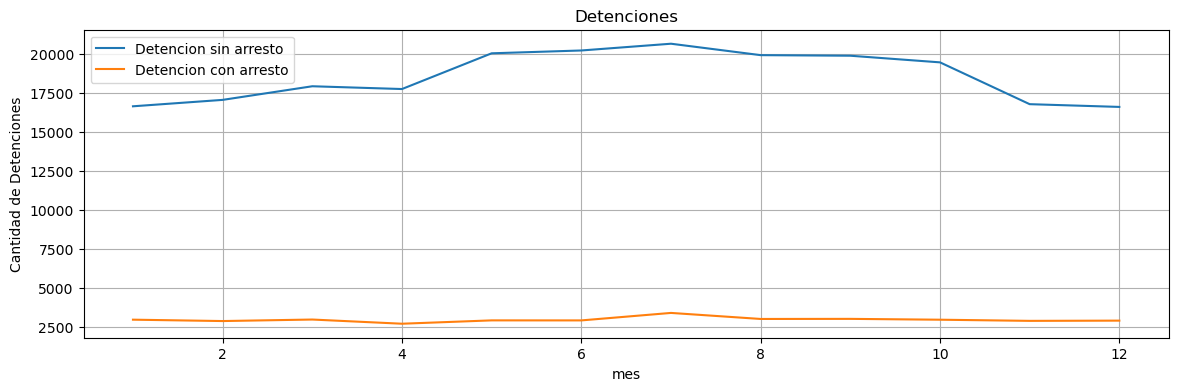

In [110]:
detencion_con_arresto = df_csv[df_csv['Arrest'] == True].groupby('mes').size()
detencion_sin_arresto = df_csv[df_csv['Arrest'] == False].groupby('mes').size()

#print(detencion_con_arresto)
#print(detencion_sin_arresto)

plt.figure(figsize=(14, 4))

plt.plot(detencion_sin_arresto, label="Detencion sin arresto")
plt.plot(detencion_con_arresto, label="Detencion con arresto")


# Títulos y etiquetas
plt.title("Detenciones")
plt.xlabel("mes")
plt.ylabel("Cantidad de Detenciones")
plt.legend()
plt.grid(True)

plt.show()


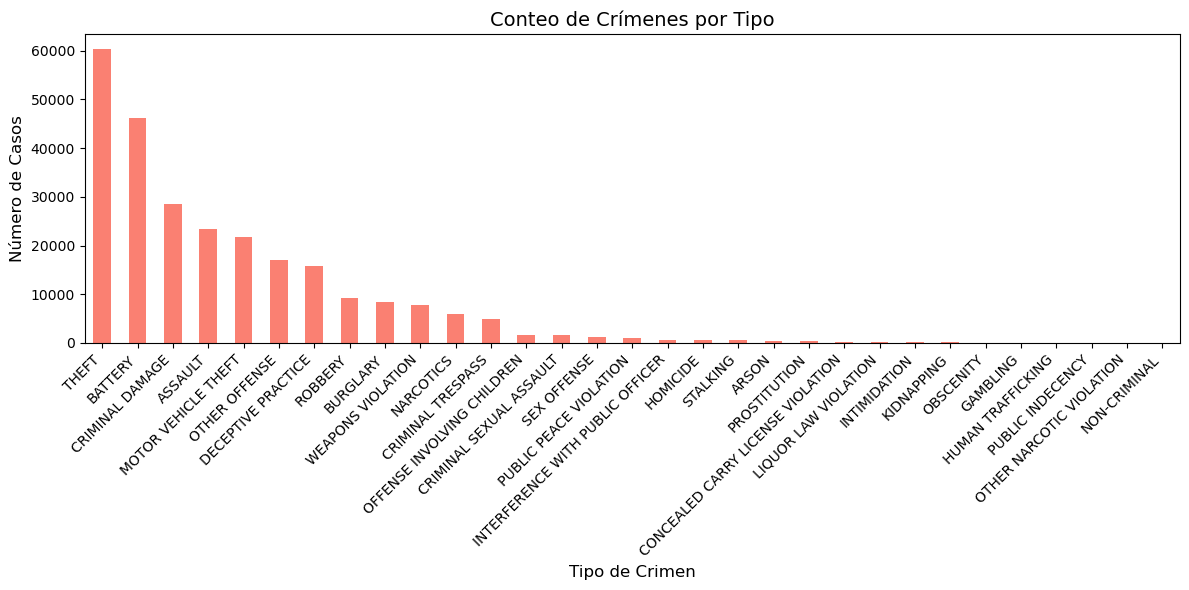

In [112]:
#Conteo de crímenes por tipo
# Paso 2: Contar los crímenes por tipo (columna 'Primary Type')
crimenes_por_tipo = df_csv['Primary Type'].value_counts().sort_values(ascending=False)

# Paso 3: Graficar en un gráfico de barras
plt.figure(figsize=(12, 6))
crimenes_por_tipo.plot(kind='bar', color='salmon')

# Etiquetas y título
plt.title('Conteo de Crímenes por Tipo', fontsize=14)
plt.xlabel('Tipo de Crimen', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)

# Ajustes de las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Ajuste del layout para que no se corte nada
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<Axes: >

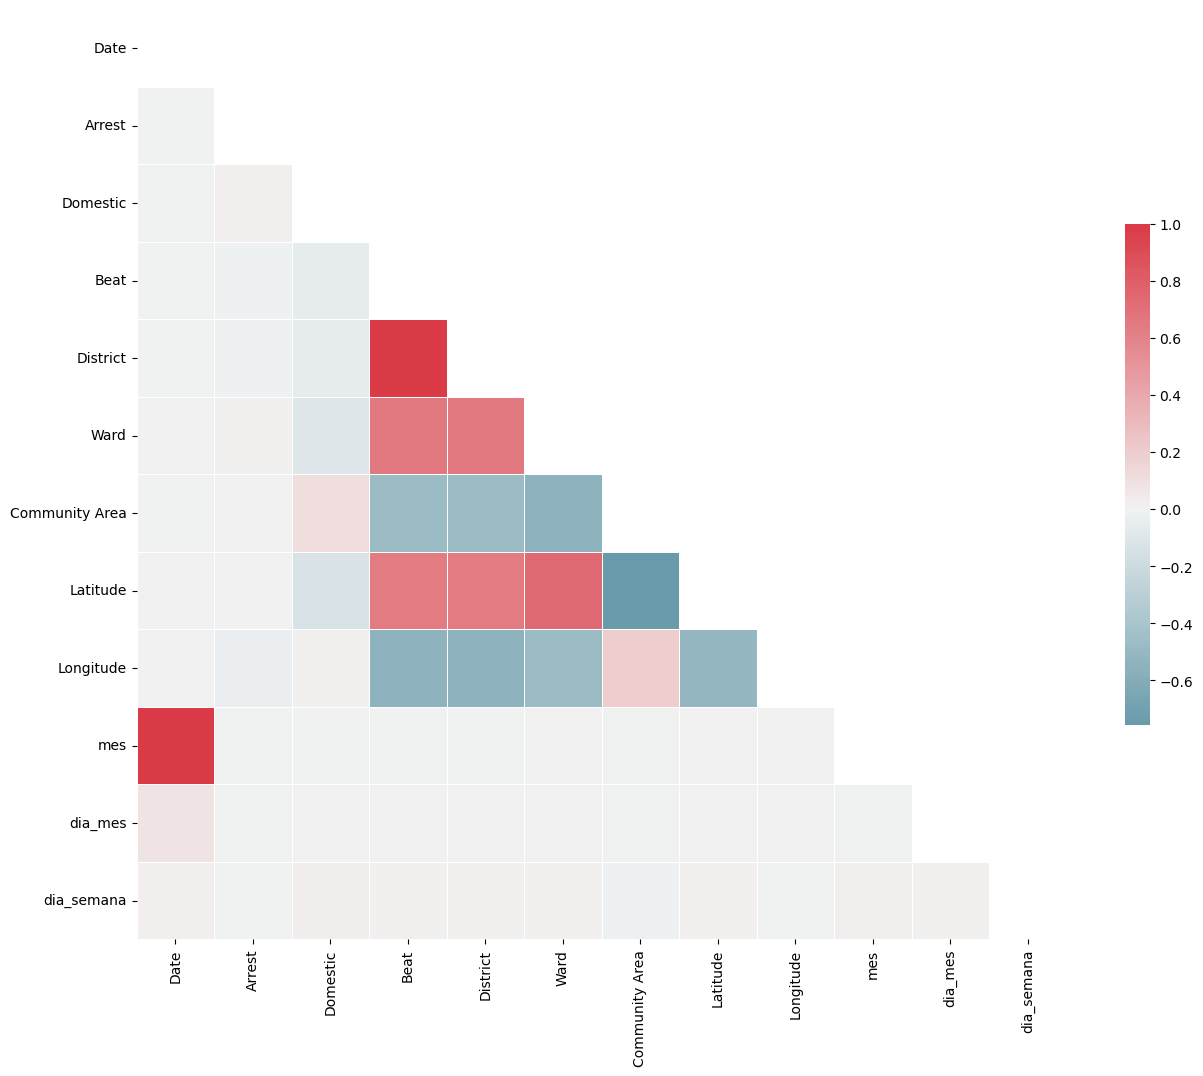

In [114]:
corr_cols = ['Date', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 
 'Latitude', 'Longitude', 'mes', 'dia_mes', 'dia_semana', 'hora']
df_corr = df_csv[corr_cols]
corr = df_corr.corr(method = 'pearson') #.sort_values(by = 'SalePrice', axis = 0, ascending = False).sort_values(by = 'SalePrice', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:12,0:12], mask=mask[0:12,0:12], cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = False)

In [116]:
print(df_csv.columns.values)

['Date' 'IUCR' 'Primary Type' 'Description' 'Location Description'
 'Arrest' 'Domestic' 'Beat' 'District' 'Ward' 'Community Area' 'FBI Code'
 'Latitude' 'Longitude' 'mes' 'dia_mes' 'dia_semana' 'hora']


Número de clases FBI Code: 26
FBI Code
06     61232
08B    38340
14     28549
07     21699
08A    19577
26     18895
11     14279
03      9121
04B     8184
15      8039
04A     7900
05      7650
18      5960
02      1767
24      1653
17      1613
10      1502
20       684
01A      559
09       482
16       307
22       196
13        64
12        35
19        22
01B        2
Name: count, dtype: int64


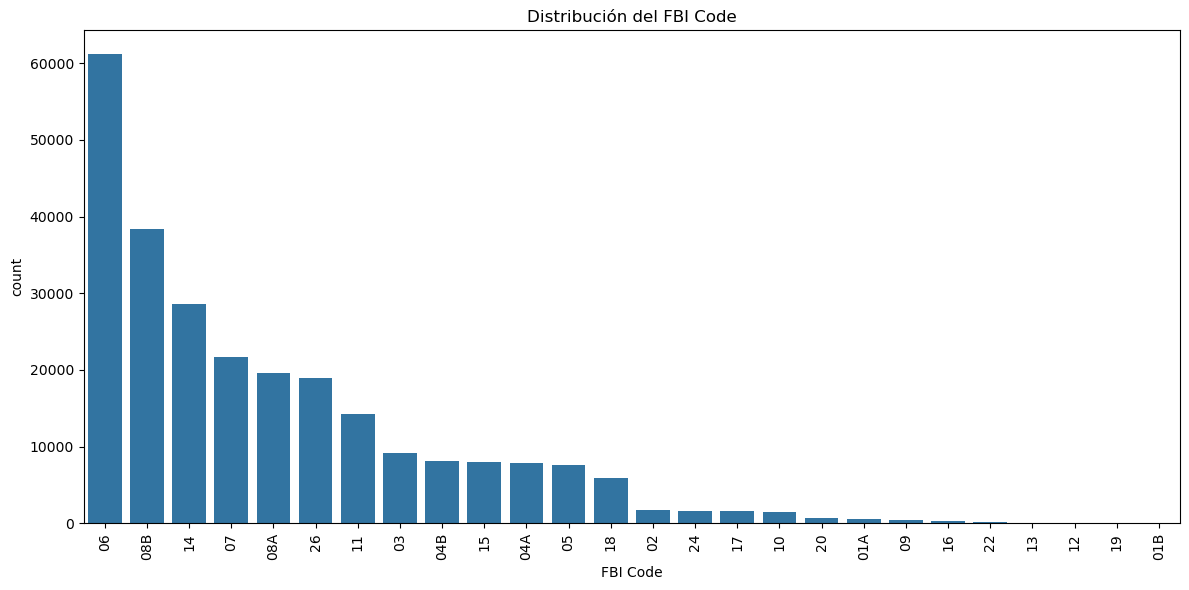

In [118]:
# Distribución de clases en FBI Code
fbi_counts = df_csv['FBI Code'].value_counts()

# Mostramos la cantidad de clases
print(f"Número de clases FBI Code: {len(fbi_counts)}")
print(fbi_counts)

# Armamos una visualización
plt.figure(figsize=(12, 6))
sns.countplot(data=df_csv, x='FBI Code', order=fbi_counts.index)
plt.xticks(rotation=90)
plt.title('Distribución del FBI Code')
plt.tight_layout()
plt.show()

# 🛠 Armado y busqueda de modelo.

En esta sección, mostraremos cuáles fueron los pasos a seguir para el armado y búsqueda de modelos de predicción.


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Seleccionamos las columnas que vamos utilizar (target)
cols_modelo = [
    'IUCR', 'Primary Type', 'Description', 'Location Description',
    'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
    'Latitude', 'Longitude', 'mes', 'dia_mes', 'dia_semana', 'hora'
]

# Armamos una copia del dataframe trabajado
df_model = df_csv[cols_modelo].copy()

# Separamos features y target
X = df_model.drop('FBI Code', axis=1)
y = df_model['FBI Code']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo de árbol de decisión



# 🧾 Resumen y conclusiones

En esta sección mencionamos los principales hallazgos del análisis realizado. Se destacan las relaciones más relevantes entre variables, los patrones identificados y las decisiones tomadas en el tratamiento de los datos. Además de próximos pasos que se podrían dar como trabajo futuro.


In [ ]:
# ALGO